In [113]:
%pylab inline
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation
import matplotlib.cm as cm
import matplotlib.figure as fig
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
import numpy as np
import numpy.ma as ma
from netCDF4 import Dataset
from scipy.ndimage import label, generate_binary_structure
from collections import Counter
import xarray as xr 
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [164]:
# #volume read in data
profilesC11tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestCarpf100EntrainmentCode_total11.csv')
profilesC25tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestCarpf100EntrainmentCodetotal25.csv')

dilC11tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/CarpDIL100EntrainCode_total11.csv')
dilC21tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/CarpDIL100EntrainCode_total21.csv')
dilC31tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/CarpDIL100EntrainCode_total31.csv')

qciC23tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Carp100EntrainmentCode_qci23.csv')
qciC25tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Carp100EntrainmentCode_qci25.csv')
qciC35tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Carp100EntrainmentCode_qci35.csv')

profilesH11tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestHalf100EntrainmentCode_total11.csv')
profilesH25tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestHalf100EntrainmentCodetotal25.csv')

dilH11tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/HalfDIL100EntrainCode_total11.csv')
dilH21tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/HalfDIL100EntrainCode_total21.csv')
dilH31tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/HalfDIL100EntrainCode_total31.csv')

qciH23tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Half100EntrainmentCode_qci23.csv')
qciH25tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Half100EntrainmentCode_qci25.csv')
qciH35tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Half100EntrainmentCode_qci35.csv')


profilesF11tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestFull100EntrainmentCode_total11.csv')
profilesF25tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestFull100EntrainmentCodetotal25.csv')

dilF11tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/FullDIL100EntrainCode_total11.csv')
dilF21tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/FullDIL100EntrainCode_total21.csv')
dilF31tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/FullDIL100EntrainCode_total31.csv')

qciF23tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Full100EntrainmentCode_qci23.csv')
qciF25tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Full100EntrainmentCode_qci25.csv')
qciF35tot = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/Full100EntrainmentCode_qci35.csv')

corecarp = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/CarpCorebottom_100m_nssl.csv')
corehalf = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/HalfCorebottom_100m_nssl.csv')
corefull = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/FullCorebottom_100m_nssl.csv')

# entrainment normalized by domain volume
# volcarp11 = profilesC11tot['corevol'][:]
# volcarp25 = profilesC25tot['corevol'][:]
# entraincarp11 = profilesC11tot['evolavg'][:]
# entraincarp25 = profilesC25tot['evolavg'][:]
# dilvolcarp11 = dilC11tot['corevol'][:]
# dilvolcarp21 = dilC21tot['corevol'][:]
# dilvolcarp31 = dilC31tot['corevol'][:]
# dilentraincarp11 = dilC11tot['evolavg'][:]
# dilentraincarp21 = dilC21tot['evolavg'][:]
# dilentraincarp31 = dilC31tot['evolavg'][:]
# qcivolcarp23 = qciC23tot['corevol'][:]
# qcivolcarp25 = qciC25tot['corevol'][:]
# qcivolcarp35 = qciC35tot['corevol'][:]
# qcientraincarp23 = qciC23tot['evolavg'][:]
# qcientraincarp25 = qciC25tot['evolavg'][:]
# qcientraincarp35 = qciC35tot['evolavg'][:]
# sacarp11 = profilesC11tot['coresa'][:]
# sacarp25 = profilesC25tot['coresa'][:]
# dilsacarp11 = dilC11tot['coresa'][:]
# dilsacarp21 = dilC21tot['coresa'][:]
# dilsacarp31 = dilC31tot['coresa'][:]
# qcisacarp23 = qciC23tot['coresa'][:]
# qcisacarp25 = qciC25tot['coresa'][:]
# qcisacarp35 = qciC35tot['coresa'][:]

# volhalf11 = profilesH11tot['corevol'][:]
# volhalf25 = profilesH25tot['corevol'][:]
# entrainhalf11 = profilesH11tot['evolavg'][:]
# entrainhalf25 = profilesH25tot['evolavg'][:]
# dilvolhalf11 = dilH11tot['corevol'][:]
# dilvolhalf21 = dilH21tot['corevol'][:]
# dilvolhalf31 = dilH31tot['corevol'][:]
# dilentrainhalf11 = dilH11tot['evolavg'][:]
# dilentrainhalf21 = dilH21tot['evolavg'][:]
# dilentrainhalf31 = dilH31tot['evolavg'][:]
# qcivolhalf23 = qciH23tot['corevol'][:]
# qcivolhalf25 = qciH25tot['corevol'][:]
# qcivolhalf35 = qciH35tot['corevol'][:]
# qcientrainhalf23 = qciH23tot['evolavg'][:]
# qcientrainhalf25 = qciH25tot['evolavg'][:]
# qcientrainhalf35 = qciH35tot['evolavg'][:]
# sahalf11 = profilesH11tot['coresa'][:]
# sahalf25 = profilesH25tot['coresa'][:]
# dilsahalf11 = dilH11tot['coresa'][:]
# dilsahalf21 = dilH21tot['coresa'][:]
# dilsahalf31 = dilH31tot['coresa'][:]
# qcisahalf23 = qciH23tot['coresa'][:]
# qcisahalf25 = qciH25tot['coresa'][:]
# qcisahalf35 = qciH35tot['coresa'][:]

# volfull11 = profilesF11tot['corevol'][:]
# volfull25 = profilesF25tot['corevol'][:]
# entrainfull11 = profilesF11tot['evolavg'][:]
# entrainfull25 = profilesF25tot['evolavg'][:]
# dilvolfull11 = dilF11tot['corevol'][:]
# dilvolfull21 = dilF21tot['corevol'][:]
# dilvolfull31 = dilF31tot['corevol'][:]
# dilentrainfull11 = dilF11tot['evolavg'][:]
# dilentrainfull21 = dilF21tot['evolavg'][:]
# dilentrainfull31 = dilF31tot['evolavg'][:]
# qcivolfull23 = qciF23tot['corevol'][:]
# qcivolfull25 = qciF25tot['corevol'][:]
# qcivolfull35 = qciF35tot['corevol'][:]
# qcientrainfull23 = qciF23tot['evolavg'][:]
# qcientrainfull25 = qciF25tot['evolavg'][:]
# qcientrainfull35 = qciF35tot['evolavg'][:]
# safull11 = profilesF11tot['coresa'][:]
# safull25 = profilesF25tot['coresa'][:]
# dilsafull11 = dilF11tot['coresa'][:]
# dilsafull21 = dilF21tot['coresa'][:]
# dilsafull31 = dilF31tot['coresa'][:]
# qcisafull23 = qciF23tot['coresa'][:]
# qcisafull25 = qciF25tot['coresa'][:]
# qcisafull35 = qciF35tot['coresa'][:]


#entrainment normalized by core surface area
volcarp11 = profilesC11tot['corevol'][:]
volcarp25 = profilesC25tot['corevol'][:]
entraincarp11 = profilesC11tot['eareaavg'][:]
entraincarp25 = profilesC25tot['eareaavg'][:]
dilvolcarp11 = dilC11tot['corevol'][:]
dilvolcarp21 = dilC21tot['corevol'][:]
dilvolcarp31 = dilC31tot['corevol'][:]
dilentraincarp11 = dilC11tot['eareaavg'][:]
dilentraincarp21 = dilC21tot['eareaavg'][:]
dilentraincarp31 = dilC31tot['eareaavg'][:]
qcivolcarp23 = qciC23tot['corevol'][:]
qcivolcarp25 = qciC25tot['corevol'][:]
qcivolcarp35 = qciC35tot['corevol'][:]
qcientraincarp23 = qciC23tot['eareaavg'][:]
qcientraincarp25 = qciC25tot['eareaavg'][:]
qcientraincarp35 = qciC35tot['eareaavg'][:]
sacarp11 = profilesC11tot['coresa'][:]
sacarp25 = profilesC25tot['coresa'][:]
dilsacarp11 = dilC11tot['coresa'][:]
dilsacarp21 = dilC21tot['coresa'][:]
dilsacarp31 = dilC31tot['coresa'][:]
qcisacarp23 = qciC23tot['coresa'][:]
qcisacarp25 = qciC25tot['coresa'][:]
qcisacarp35 = qciC35tot['coresa'][:]


volhalf11 = profilesH11tot['corevol'][:]
volhalf25 = profilesH25tot['corevol'][:]
entrainhalf11 = profilesH11tot['eareaavg'][:]
entrainhalf25 = profilesH25tot['eareaavg'][:]
dilvolhalf11 = dilH11tot['corevol'][:]
dilvolhalf21 = dilH21tot['corevol'][:]
dilvolhalf31 = dilH31tot['corevol'][:]
dilentrainhalf11 = dilH11tot['eareaavg'][:]
dilentrainhalf21 = dilH21tot['eareaavg'][:]
dilentrainhalf31 = dilH31tot['eareaavg'][:]
qcivolhalf23 = qciH23tot['corevol'][:]
qcivolhalf25 = qciH25tot['corevol'][:]
qcivolhalf35 = qciH35tot['corevol'][:]
qcientrainhalf23 = qciH23tot['eareaavg'][:]
qcientrainhalf25 = qciH25tot['eareaavg'][:]
qcientrainhalf35 = qciH35tot['eareaavg'][:]
sahalf11 = profilesH11tot['coresa'][:]
sahalf25 = profilesH25tot['coresa'][:]
dilsahalf11 = dilH11tot['coresa'][:]
dilsahalf21 = dilH21tot['coresa'][:]
dilsahalf31 = dilH31tot['coresa'][:]
qcisahalf23 = qciH23tot['coresa'][:]
qcisahalf25 = qciH25tot['coresa'][:]
qcisahalf35 = qciH35tot['coresa'][:]


volfull11 = profilesF11tot['corevol'][:]
volfull25 = profilesF25tot['corevol'][:]
entrainfull11 = profilesF11tot['eareaavg'][:]
entrainfull25 = profilesF25tot['eareaavg'][:]
dilvolfull11 = dilF11tot['corevol'][:]
dilvolfull21 = dilF21tot['corevol'][:]
dilvolfull31 = dilF31tot['corevol'][:]
dilentrainfull11 = dilF11tot['eareaavg'][:]
dilentrainfull21 = dilF21tot['eareaavg'][:]
dilentrainfull31 = dilF31tot['eareaavg'][:]
qcivolfull23 = qciF23tot['corevol'][:]
qcivolfull25 = qciF25tot['corevol'][:]
qcivolfull35 = qciF35tot['corevol'][:]
qcientrainfull23 = qciF23tot['eareaavg'][:]
qcientrainfull25 = qciF25tot['eareaavg'][:]
qcientrainfull35 = qciF35tot['eareaavg'][:]
safull11 = profilesF11tot['coresa'][:]
safull25 = profilesF25tot['coresa'][:]
dilsafull11 = dilF11tot['coresa'][:]
dilsafull21 = dilF21tot['coresa'][:]
dilsafull31 = dilF31tot['coresa'][:]
qcisafull23 = qciF23tot['coresa'][:]
qcisafull25 = qciF25tot['coresa'][:]
qcisafull35 = qciF35tot['coresa'][:]

corecarpqv = corecarp['Qv'][2:61]
corecarpqtot = corecarp['Qtot'][2:61]
fakepecarp = corecarpqv/corecarpqtot

corehalfqv = corehalf['Qv'][8:45]
corehalfqtot = corehalf['Qtot'][8:45]
fakepehalf = corehalfqv/corehalfqtot

corefullqv = corefull['Qv'][13:45]
corefullqtot = corefull['Qtot'][13:45]
fakepefull = corefullqv/corefullqtot

In [165]:
#needs bottom section uncommented for surface area

checksa = qcientrainfull35[6045] * qcisafull35[6045]
print(qcientrainfull35[6050])
print(qcisafull35[6050])
print(checksa)

6.28
5270000.0
40315200.0


In [166]:
#needs top section uncommented for domain slab average

checkdomain = qcientrainfull35[6030:6051].astype(np.float)
print(checkdomain[6045])
checkdomain2 = checkdomain[6045] * 7.744*10**11
print(checkdomain2)

6.81
5.273664e+12


In [117]:
#cloudtop read in data

datacarp = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestCarpfullCloudtop_100m_nssl.csv')
datahalf = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestHalfCloudtop_100m_nssl.csv')
datafull = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/NewestFullCloudtop_100m_nssl.csv')

heightcarp = datacarp['Height'][:]
heighthalf = datahalf['Height'][:]
heightfull = datafull['Height'][:]

areacarp = datacarp['Area'][:]
areahalf = datahalf['Area'][:]
areafull = datafull['Area'][:]

levels1 = 76
levels2 = 76
#levels3 = 200 #height of calculating entrainment when want the whole domain
levels3 = 30 #height of calculating entrainment when want above 3 km **need to set first number in for loop to 30 **60
# levels3 = 50 #height of calculating entrainment when want above 3 km **need to set first number in for loop to 30 **80
# levels3 = 70 #height of calculating entrainment when want above 3 km **need to set first number in for loop to 30 **100
# levels3 = 90 #height of calculating entrainment when want above 3 km **need to set first number in for loop to 30 **120
levels4 = 200 #number of how many rows to skip

In [118]:
#read in PE data
pehalfdata = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/PEqv_HALF_100m_nssl.csv')
pefulldata = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/PEqv_FULL_100m_nssl.csv')
pecarpdata = pd.read_csv('/data/slasher/a/engelse2/Entrain/NEW/PEqv_CARP_100m_nssl.csv')

pehalf = pehalfdata['pe'][:]
pefull = pefulldata['pe'][:]
pecarp = pecarpdata['pe'][:]

#time arrays
timehalf = np.arange(0,46)
timefull = np.arange(0,46)
timecarp = np.arange(0,62)

In [119]:
#carp cloudtop create area and cloudtop height
height1 = {}
area1 = {}
counter = -1
for i in np.arange(0,datacarp['Height'][:].shape[0],levels1+1):
    counter = counter + 1
    h1 = np.asarray(heightcarp[i:i+levels1-1],dtype=float)
    a1 = np.asarray(areacarp[i:i+levels1-1],dtype=float)
    height1[counter] = h1
    area1[counter] = a1

In [120]:
#half cloudtop create area and cloudtop height
height2 = {}
area2 = {}
counter = -1
for i in np.arange(0,datahalf['Height'][:].shape[0],levels2+1):
    counter = counter + 1
    h2 = np.asarray(heighthalf[i:i+levels2-1],dtype=float)
    a2 = np.asarray(areahalf[i:i+levels2-1],dtype=float)
    height2[counter] = h2
    area2[counter] = a2

In [121]:
#full cloudtop create area and cloudtop height
height3 = {}
area3 = {}
counter = -1
for i in np.arange(0,datafull['Height'][:].shape[0],levels2+1):
    counter = counter + 1
    h3 = np.asarray(heightfull[i:i+levels2-1],dtype=float)
    a3 = np.asarray(areafull[i:i+levels2-1],dtype=float)
    height3[counter] = h3
    area3[counter] = a3

In [122]:
#area1.keys()
# tots_area = np.zeros(len(area1))
# for i in np.arange(0,len(area1)):
#     tots_area[i] = np.sum(area1[i])

In [123]:
# print(area2)

In [124]:
# #carp volume create volume11 and volume 25
vol1 = {}
vol2 = {}
vol3 = {}
vol4 = {}
vol5 = {}
vol6 = {}
vol7 = {}
vol8 = {}
entrain1 = {}
entrain2 = {}
entrain3 = {}
entrain4 = {}
entrain5 = {}
entrain6 = {}
entrain7 = {}
entrain8 = {}
sa1 = {}
sa2 = {}
sa3 = {}
sa4 = {}
sa5 = {}
sa6 = {}
sa7 = {}
sa8 = {}
counter = -1
for i in np.arange(30,profilesC11tot['corevol'][:].shape[0],levels4+1):
    counter = counter+1                                                     #levels4 = number of rows skipping (200)
    v1 = np.asarray(volcarp11[i:i+levels3-1],dtype=float)                   #levels3 = height of adding entrainment
    v2 = np.asarray(volcarp25[i:i+levels3-1],dtype=float) 
    v3 = np.asarray(dilvolcarp11[i:i+levels3-1],dtype=float)
    v4 = np.asarray(dilvolcarp21[i:i+levels3-1],dtype=float)
    v5 = np.asarray(dilvolcarp31[i:i+levels3-1],dtype=float)
    v6 = np.asarray(qcivolcarp23[i:i+levels3-1],dtype=float)
    v7 = np.asarray(qcivolcarp25[i:i+levels3-1],dtype=float)
    v8 = np.asarray(qcivolcarp35[i:i+levels3-1],dtype=float)
    e1 = np.asarray(entraincarp11[i:i+levels3-1],dtype=float)  
    e2 = np.asarray(entraincarp25[i:i+levels3-1],dtype=float) 
    e3 = np.asarray(dilentraincarp11[i:i+levels3-1],dtype=float)
    e4 = np.asarray(dilentraincarp21[i:i+levels3-1],dtype=float)
    e5 = np.asarray(dilentraincarp31[i:i+levels3-1],dtype=float)
    e6 = np.asarray(qcientraincarp23[i:i+levels3-1],dtype=float)
    e7 = np.asarray(qcientraincarp25[i:i+levels3-1],dtype=float)
    e8 = np.asarray(qcientraincarp35[i:i+levels3-1],dtype=float)
    s1 = np.asarray(sacarp11[i:i+levels3-1],dtype=float)  
    s2 = np.asarray(sacarp25[i:i+levels3-1],dtype=float) 
    s3 = np.asarray(dilsacarp11[i:i+levels3-1],dtype=float)
    s4 = np.asarray(dilsacarp21[i:i+levels3-1],dtype=float)
    s5 = np.asarray(dilsacarp31[i:i+levels3-1],dtype=float)
    s6 = np.asarray(qcisacarp23[i:i+levels3-1],dtype=float)
    s7 = np.asarray(qcisacarp25[i:i+levels3-1],dtype=float)
    s8 = np.asarray(qcisacarp35[i:i+levels3-1],dtype=float)
    vol1[counter] = v1
    vol2[counter] = v2
    vol3[counter] = v3
    vol4[counter] = v4
    vol5[counter] = v5
    vol6[counter] = v6
    vol7[counter] = v7
    vol8[counter] = v8
    entrain1[counter] = e1
    entrain2[counter] = e2
    entrain3[counter] = e3
    entrain4[counter] = e4
    entrain5[counter] = e5
    entrain6[counter] = e6
    entrain7[counter] = e7
    entrain8[counter] = e8
    sa1[counter] = s1
    sa2[counter] = s2
    sa3[counter] = s3
    sa4[counter] = s4
    sa5[counter] = s5
    sa6[counter] = s6
    sa7[counter] = s7
    sa8[counter] = s8

In [125]:
# #half volume create volume11 and volume 25
vol9 = {}
vol10 = {}
vol11 = {}
vol12 = {}
vol13 = {}
vol14 = {}
vol15 = {}
vol16 = {}
entrain9 = {}
entrain10 = {}
entrain11 = {}
entrain12 = {}
entrain13 = {}
entrain14 = {}
entrain15 = {}
entrain16 = {}
sa9 = {}
sa10 = {}
sa11 = {}
sa12 = {}
sa13 = {}
sa14 = {}
sa15 = {}
sa16 = {}
counter = -1
for i in np.arange(30,profilesH11tot['corevol'][:].shape[0],levels4+1):
    counter = counter+1
    v9 = np.asarray(volhalf11[i:i+levels3-1],dtype=float)  
    v10 = np.asarray(volhalf25[i:i+levels3-1],dtype=float)  
    v11 = np.asarray(dilvolhalf11[i:i+levels3-1],dtype=float)  
    v12 = np.asarray(dilvolhalf21[i:i+levels3-1],dtype=float)  
    v13 = np.asarray(dilvolhalf31[i:i+levels3-1],dtype=float) #making an array of entrainment with height for each time
    v14 = np.asarray(qcivolhalf23[i:i+levels3-1],dtype=float)
    v15 = np.asarray(qcivolhalf25[i:i+levels3-1],dtype=float)
    v16 = np.asarray(qcivolhalf35[i:i+levels3-1],dtype=float)
    e9 = np.asarray(entrainhalf11[i:i+levels3-1],dtype=float)  
    e10 = np.asarray(entrainhalf25[i:i+levels3-1],dtype=float) 
    e11 = np.asarray(dilentrainhalf11[i:i+levels3-1],dtype=float)
    e12 = np.asarray(dilentrainhalf21[i:i+levels3-1],dtype=float)
    e13 = np.asarray(dilentrainhalf31[i:i+levels3-1],dtype=float)
    e14 = np.asarray(qcientrainhalf23[i:i+levels3-1],dtype=float)
    e15 = np.asarray(qcientrainhalf25[i:i+levels3-1],dtype=float)
    e16 = np.asarray(qcientrainhalf35[i:i+levels3-1],dtype=float)
    s9 = np.asarray(sahalf11[i:i+levels3-1],dtype=float)  
    s10 = np.asarray(sahalf25[i:i+levels3-1],dtype=float) 
    s11 = np.asarray(dilsahalf11[i:i+levels3-1],dtype=float)
    s12 = np.asarray(dilsahalf21[i:i+levels3-1],dtype=float)
    s13 = np.asarray(dilsahalf31[i:i+levels3-1],dtype=float)
    s14 = np.asarray(qcisahalf23[i:i+levels3-1],dtype=float)
    s15 = np.asarray(qcisahalf25[i:i+levels3-1],dtype=float)
    s16 = np.asarray(qcisahalf35[i:i+levels3-1],dtype=float)
    
    vol9[counter] = v9
    vol10[counter] = v10
    vol11[counter] = v11       #combining all times into a dictionary
    vol12[counter] = v12        
    vol13[counter] = v13    # vol9 is a dictionary containing the entrainment values for all heights at a given time
    vol14[counter] = v14  #time 34 would be vol9[34] & would contain all values of entrainment for each height at t=34
    vol15[counter] = v15
    vol16[counter] = v16
    entrain9[counter] = e9
    entrain10[counter] = e10     #entrain10 is dictionary e10 is array
    entrain11[counter] = e11
    entrain12[counter] = e12
    entrain13[counter] = e13
    entrain14[counter] = e14
    entrain15[counter] = e15
    entrain16[counter] = e16
    sa9[counter] = s9
    sa10[counter] = s10
    sa11[counter] = s11       #combining all times into a dictionary
    sa12[counter] = s12        
    sa13[counter] = s13    # vol9 is a dictionary containing the entrainment values for all heights at a given time
    sa14[counter] = s14  #time 34 would be vol9[34] & would contain all values of entrainment for each height at t=34
    sa15[counter] = s15
    sa16[counter] = s16

In [126]:
print(entrain9[40])
#print(e9[0])

[ 3.09  3.05  2.98  3.09  3.17  3.2   3.11  3.07  3.1   3.08  2.95  2.93
  2.91  2.81  2.77  2.86  2.94  2.96  3.03  3.08  3.2   3.34  3.57  3.73
  3.94  4.14  4.28  4.37  4.53]


In [127]:
# #full volume create volume11 and volume 25
vol17 = {}
vol18 = {}
vol19 = {}
vol20 = {}
vol21 = {}
vol22 = {}
vol23 = {}
vol24 = {}
entrain17 = {}
entrain18 = {}
entrain19 = {}
entrain20 = {}
entrain21 = {}
entrain22 = {}
entrain23 = {}
entrain24 = {}
sa17 = {}
sa18 = {}
sa19 = {}
sa20 = {}
sa21 = {}
sa22 = {}
sa23 = {}
sa24 = {}
counter = -1
for i in np.arange(30,profilesF11tot['corevol'][:].shape[0],levels4+1):
    counter = counter+1
    v17 = np.asarray(volfull11[i:i+levels3-1],dtype=float)  
    v18 = np.asarray(volfull25[i:i+levels3-1],dtype=float) 
    v19 = np.asarray(dilvolfull11[i:i+levels3-1],dtype=float)   
    v20 = np.asarray(dilvolfull21[i:i+levels3-1],dtype=float) 
    v21 = np.asarray(dilvolfull31[i:i+levels3-1],dtype=float)
    v22 = np.asarray(qcivolfull23[i:i+levels3-1],dtype=float)
    v23 = np.asarray(qcivolfull25[i:i+levels3-1],dtype=float)
    v24 = np.asarray(qcivolfull35[i:i+levels3-1],dtype=float)
    e17 = np.asarray(entrainfull11[i:i+levels3-1],dtype=float)  
    e18 = np.asarray(entrainfull25[i:i+levels3-1],dtype=float) 
    e19 = np.asarray(dilentrainfull11[i:i+levels3-1],dtype=float)
    e20 = np.asarray(dilentrainfull21[i:i+levels3-1],dtype=float)
    e21 = np.asarray(dilentrainfull31[i:i+levels3-1],dtype=float)
    e22 = np.asarray(qcientrainfull23[i:i+levels3-1],dtype=float)
    e23 = np.asarray(qcientrainfull25[i:i+levels3-1],dtype=float)
    e24 = np.asarray(qcientrainfull35[i:i+levels3-1],dtype=float)
    s17 = np.asarray(entrainfull11[i:i+levels3-1],dtype=float)  
    s18 = np.asarray(entrainfull25[i:i+levels3-1],dtype=float) 
    s19 = np.asarray(dilentrainfull11[i:i+levels3-1],dtype=float)
    s20 = np.asarray(dilentrainfull21[i:i+levels3-1],dtype=float)
    s21 = np.asarray(dilentrainfull31[i:i+levels3-1],dtype=float)
    s22 = np.asarray(qcientrainfull23[i:i+levels3-1],dtype=float)
    s23 = np.asarray(qcientrainfull25[i:i+levels3-1],dtype=float)
    s24 = np.asarray(qcientrainfull35[i:i+levels3-1],dtype=float)
    vol17[counter] = v17
    vol18[counter] = v18
    vol19[counter] = v19
    vol20[counter] = v20
    vol21[counter] = v21
    vol22[counter] = v22
    vol23[counter] = v23
    vol24[counter] = v24
    entrain17[counter] = e17
    entrain18[counter] = e18
    entrain19[counter] = e19
    entrain20[counter] = e20
    entrain21[counter] = e21
    entrain22[counter] = e22
    entrain23[counter] = e23
    entrain24[counter] = e24
    sa17[counter] = s17
    sa18[counter] = s18
    sa19[counter] = s19
    sa20[counter] = s20
    sa21[counter] = s21
    sa22[counter] = s22
    sa23[counter] = s23
    sa24[counter] = s24

In [128]:
# entrain17[44]
print(np.shape(entrain17[44]))
print(e24)

(29,)
[ 3.84  3.87  3.86  3.89  3.85  3.77  3.69  3.76  3.88  3.83  3.67  3.49
  3.37  3.36  3.37  3.31  3.18  3.13  3.12  3.13  3.21  3.25  3.29  3.26
  3.27  3.26  3.49  3.55  3.82]


In [129]:
#carp cloudtop
cloudtop1=np.zeros(len(height1))
for i in np.arange(0,len(height1)):
    trial1 = area1[i]
    trial2 = height1[i]
    trial1[trial1 ==0] = np.nan
    ind1 = np.where(trial1 == np.nanmin(trial1))
    if len(ind1[0]) == 0:
        cloudtop1[i] = 0.0
    elif len(ind1[0]) == 1:
        cloudtop1[i] = trial2[ind1[0]]
    elif len(ind1[0]) > 1:
        cloudtop1[i] = trial2[ind1[0][len(ind1)-1]]

In [130]:
#half cloudtop
cloudtop2=np.zeros(len(height2))
for i in np.arange(0,len(height2)):
    trial3 = area2[i]
    trial4 = height2[i]
    trial3[trial3 ==0] = np.nan
    ind2 = np.where(trial3 == np.nanmin(trial3))
    if len(ind2[0]) == 0:
        cloudtop2[i] = 0.0
    elif len(ind2[0]) == 1:
        cloudtop2[i] = trial4[ind2[0]]
    elif len(ind2[0]) > 1:
        cloudtop2[i] = trial4[ind2[0][len(ind2)-1]]

In [131]:
#full cloudtop
cloudtop3=np.zeros(len(height3))
for i in np.arange(0,len(height3)):
    trial5 = area3[i]
    trial6 = height3[i]
    trial5[trial5 ==0] = np.nan
    ind3 = np.where(trial5 == np.nanmin(trial5))
    if len(ind3[0]) == 0:
        cloudtop3[i] = 0.0
    elif len(ind3[0]) == 1:
        cloudtop3[i] = trial6[ind3[0]]
    elif len(ind3[0]) > 1:
        cloudtop3[i] = trial6[ind3[0][len(ind3)-1]]

In [132]:
print(len(vol1))

61


In [133]:
# #carp volume and entrain
volumec11 = np.zeros(len(vol1))
volumec25 = np.zeros(len(vol1))
dilvolumec11 = np.zeros(len(vol1))
dilvolumec21 = np.zeros(len(vol1))
dilvolumec31 = np.zeros(len(vol1))
qcivolumec23 = np.zeros(len(vol1))
qcivolumec25 = np.zeros(len(vol1))
qcivolumec35 = np.zeros(len(vol1))
entrainc11 = np.zeros(len(vol1))
entrainc25 = np.zeros(len(vol1))
dilentrainc11 = np.zeros(len(vol1))
dilentrainc21 = np.zeros(len(vol1))
dilentrainc31 = np.zeros(len(vol1))
qcientrainc23 = np.zeros(len(vol1))
qcientrainc25 = np.zeros(len(vol1))
qcientrainc35 = np.zeros(len(vol1))
sac11 = np.zeros(len(vol1))
sac25 = np.zeros(len(vol1))
dilsac11 = np.zeros(len(vol1))
dilsac21 = np.zeros(len(vol1))
dilsac31 = np.zeros(len(vol1))
qcisac23 = np.zeros(len(vol1))
qcisac25 = np.zeros(len(vol1))
qcisac35 = np.zeros(len(vol1))


for i in np.arange(0,len(vol1)):
    volsumc11 = vol1[i]
    volsumc25 = vol2[i]
    dilvolsumc11 = vol3[i]
    dilvolsumc21 = vol4[i]
    dilvolsumc31 = vol5[i]                #for each time in the dictionary vol1 ou
    qcivolsumc23 = vol6[i]
    qcivolsumc25 = vol7[i]                 #this is making the dictionary an array
    qcivolsumc35 = vol8[i]
    entrainsumc11 = entrain1[i]
    entrainsumc25 = entrain2[i]
    dilentrainsumc11 = entrain3[i]
    dilentrainsumc21 = entrain4[i]
    dilentrainsumc31 = entrain5[i]
    qcientrainsumc23 = entrain6[i]
    qcientrainsumc25 = entrain7[i]
    qcientrainsumc35 = entrain8[i]
    
    volumec11[i] = np.sum(volsumc11)
    volumec25[i] = np.sum(volsumc25)
    dilvolumec11[i] = np.sum(dilvolsumc11)
    dilvolumec21[i] = np.sum(dilvolsumc21)
    dilvolumec31[i] = np.sum(dilvolsumc31)
    qcivolumec23[i] = np.sum(qcivolsumc23)
    qcivolumec25[i] = np.sum(qcivolsumc25)              #this is making one value of entrainment for each time
    qcivolumec35[i] = np.sum(qcivolsumc35)
    entrainc11[i] = np.sum(entrainsumc11)                 #index the sum to get rid of the inflow
    entrainc25[i] = np.sum(entrainsumc25)
    dilentrainc11[i] = np.sum(dilentrainsumc11)
    dilentrainc21[i] = np.sum(dilentrainsumc21)
    dilentrainc31[i] = np.sum(dilentrainsumc31)
    qcientrainc23[i] = np.sum(qcientrainsumc23)
    qcientrainc25[i] = np.sum(qcientrainsumc25)
    qcientrainc35[i] = np.sum(qcientrainsumc35)

In [168]:
print(len(entrain1))
print(np.shape(volsumc11))
print(np.shape(qcivolumec23))

61
(29,)
(61,)


In [135]:
totentrainc11 = np.sum(entrainc11)
totentrainc25 = np.sum(entrainc25)

totentraindilc11 = np.sum(dilentrainc11)
totentraindilc21 = np.sum(dilentrainc21)
totentraindilc31 = np.sum(dilentrainc31)
totentrainqcic23 = np.sum(qcientrainc23)
totentrainqcic25 = np.sum(qcientrainc25)          #this is making one value of entrainment for the total simulation
totentrainqcic35 = np.sum(qcientrainc35)


#indexed
# totentrainc11 = np.sum(entrainc11[5:50])
# totentrainc25 = np.sum(entrainc25[5:50])

# totentraindilc11 = np.sum(dilentrainc11[5:50])
# totentraindilc21 = np.sum(dilentrainc21[5:50])
# totentraindilc31 = np.sum(dilentrainc31[5:50])

print(totentrainc11)
print(totentrainc25)
print(totentraindilc11)
print(totentraindilc21)
print(totentraindilc31)

4938.9107
5742.96592
4553.9674
4583.5518
4575.08935


In [136]:
#half volume
volumeh11 = np.zeros(len(vol9))
volumeh25 = np.zeros(len(vol9))
dilvolumeh11 = np.zeros(len(vol9))
dilvolumeh21 = np.zeros(len(vol9))
dilvolumeh31 = np.zeros(len(vol9))
qcivolumeh23 = np.zeros(len(vol9))
qcivolumeh25 = np.zeros(len(vol9))
qcivolumeh35 = np.zeros(len(vol9))
entrainh11 = np.zeros(len(vol9))
entrainh25 = np.zeros(len(vol9))
dilentrainh11 = np.zeros(len(vol9))
dilentrainh21 = np.zeros(len(vol9))
dilentrainh31 = np.zeros(len(vol9))
qcientrainh23 = np.zeros(len(vol9))
qcientrainh25 = np.zeros(len(vol9))
qcientrainh35 = np.zeros(len(vol9))
sah11 = np.zeros(len(vol9))
sah25 = np.zeros(len(vol9))
dilsah11 = np.zeros(len(vol9))
dilsah21 = np.zeros(len(vol9))
dilsah31 = np.zeros(len(vol9))
qcisah23 = np.zeros(len(vol9))
qcisah25 = np.zeros(len(vol9))
qcisah35 = np.zeros(len(vol9))


for i in np.arange(0,len(vol9)):
    volsumh11 = vol9[i]
    volsumh25 = vol10[i]
    dilvolsumh11 = vol11[i]
    dilvolsumh21 = vol12[i]
    dilvolsumh31 = vol13[i]
    qcivolsumh23 = vol14[i]
    qcivolsumh25 = vol15[i]
    qcivolsumh35 = vol16[i]
    entrainsumh11 = entrain9[i]
    entrainsumh25 = entrain10[i]
    dilentrainsumh11 = entrain11[i]
    dilentrainsumh21 = entrain12[i]
    dilentrainsumh31 = entrain13[i]
    qcientrainsumh23 = entrain14[i]
    qcientrainsumh25 = entrain15[i]
    qcientrainsumh35 = entrain16[i]
    
    volumeh11[i] = np.sum(volsumh11)
    volumeh25[i] = np.sum(volsumh25)
    dilvolumeh11[i] = np.sum(dilvolsumh11)
    dilvolumeh21[i] = np.sum(dilvolsumh21)
    dilvolumeh31[i] = np.sum(dilvolsumh31)
    qcivolumeh23[i] = np.sum(qcivolsumh23)
    qcivolumeh25[i] = np.sum(qcivolsumh25)
    qcivolumeh35[i] = np.sum(qcivolsumh35)
    entrainh11[i] = np.sum(entrainsumh11)              #index the sum to get rid of the inflow
    entrainh25[i] = np.sum(entrainsumh25)
    dilentrainh11[i] = np.sum(dilentrainsumh11)
    dilentrainh21[i] = np.sum(dilentrainsumh21)
    dilentrainh31[i] = np.sum(dilentrainsumh31)
    qcientrainh23[i] = np.sum(qcientrainsumh23)
    qcientrainh25[i] = np.sum(qcientrainsumh25)
    qcientrainh35[i] = np.sum(qcientrainsumh35)

In [137]:
totentrainh11 = np.sum(entrainh11)
totentrainh25 = np.sum(entrainh25)

totentraindilh11 = np.sum(dilentrainh11)
totentraindilh21 = np.sum(dilentrainh21)
totentraindilh31 = np.sum(dilentrainh31)
totentrainqcih23 = np.sum(qcientrainh23)
totentrainqcih25 = np.sum(qcientrainh25)
totentrainqcih35 = np.sum(qcientrainh35)

print(totentrainh11)
print(totentrainh25)
print(totentraindilh11)
print(totentraindilh21)
print(totentraindilh31)

3716.2047
4210.9279
3311.6872
3338.2096
3332.19602


In [138]:
#full volume
volumef11 = np.zeros(len(vol17))
volumef25 = np.zeros(len(vol17))
dilvolumef11 = np.zeros(len(vol17))
dilvolumef21 = np.zeros(len(vol17))
dilvolumef31 = np.zeros(len(vol17))
qcivolumef23 = np.zeros(len(vol17))
qcivolumef25 = np.zeros(len(vol17))
qcivolumef35 = np.zeros(len(vol17))
entrainf11 = np.zeros(len(vol17))
entrainf25 = np.zeros(len(vol17))
dilentrainf11 = np.zeros(len(vol17))
dilentrainf21 = np.zeros(len(vol17))
dilentrainf31 = np.zeros(len(vol17))
qcientrainf23 = np.zeros(len(vol17))
qcientrainf25 = np.zeros(len(vol17))
qcientrainf35 = np.zeros(len(vol17))
saf11 = np.zeros(len(vol17))
saf25 = np.zeros(len(vol17))
dilsaf11 = np.zeros(len(vol17))
dilsaf21 = np.zeros(len(vol17))
dilsaf31 = np.zeros(len(vol17))
qcisaf23 = np.zeros(len(vol17))
qcisaf25 = np.zeros(len(vol17))
qcisaf35 = np.zeros(len(vol17))


for i in np.arange(0,len(vol17)):
    volsumf11 = vol17[i]
    volsumf25 = vol18[i]
    dilvolsumf11 = vol19[i]
    dilvolsumf21 = vol20[i]
    dilvolsumf31 = vol21[i]
    qcivolsumf23 = vol22[i]
    qcivolsumf25 = vol23[i]
    qcivolsumf35 = vol24[i]
    entrainsumf11 = entrain17[i]
    entrainsumf25 = entrain18[i]
    dilentrainsumf11 = entrain19[i]
    dilentrainsumf21 = entrain20[i]
    dilentrainsumf31 = entrain21[i]
    qcientrainsumf23 = entrain22[i]
    qcientrainsumf25 = entrain23[i]
    qcientrainsumf35 = entrain24[i]
    
    volumef11[i] = np.sum(volsumf11)
    volumef25[i] = np.sum(volsumf25)
    dilvolumef11[i] = np.sum(dilvolsumf11)
    dilvolumef21[i] = np.sum(dilvolsumf21)
    dilvolumef31[i] = np.sum(dilvolsumf31)            #index the sum to get rid of the inflow
    qcivolumef23[i] = np.sum(qcivolsumf23)
    qcivolumef25[i] = np.sum(qcivolsumf25)
    qcivolumef35[i] = np.sum(qcivolsumf35)   
    entrainf11[i] = np.sum(entrainsumf11)
    entrainf25[i] = np.sum(entrainsumf25)
    dilentrainf11[i] = np.sum(dilentrainsumf11)
    dilentrainf21[i] = np.sum(dilentrainsumf21)
    dilentrainf31[i] = np.sum(dilentrainsumf31)
    qcientrainf23[i] = np.sum(qcientrainsumf23)
    qcientrainf25[i] = np.sum(qcientrainsumf25)
    qcientrainf35[i] = np.sum(qcientrainsumf35)

In [139]:
totentrainf11 = np.sum(entrainf11)
totentrainf25 = np.sum(entrainf25)

totentraindilf11 = np.sum(dilentrainf11)
totentraindilf21 = np.sum(dilentrainf21)
totentraindilf31 = np.sum(dilentrainf31)
totentrainqcif23 = np.sum(qcientrainf23)
totentrainqcif25 = np.sum(qcientrainf25)
totentrainqcif35 = np.sum(qcientrainf35)

# print(totentrainf11)
# print(totentrainf25)
# print(totentraindilf11)
# print(totentraindilf21)
# print(totentraindilf31)

In [140]:
totalentrainarray = [totentrainc11,totentrainc25,totentraindilc11,totentraindilc21,totentraindilc31,totentrainqcic23,totentrainqcic25,totentrainqcic35,totentrainh11,totentrainh25,totentraindilh11,totentraindilh21,totentraindilh31,totentrainqcih23,totentrainqcih25,totentrainqcih35,totentrainf11,totentrainf25,totentraindilf11,totentraindilf21,totentraindilf31,totentrainqcif23,totentrainqcif25,totentrainqcif35]

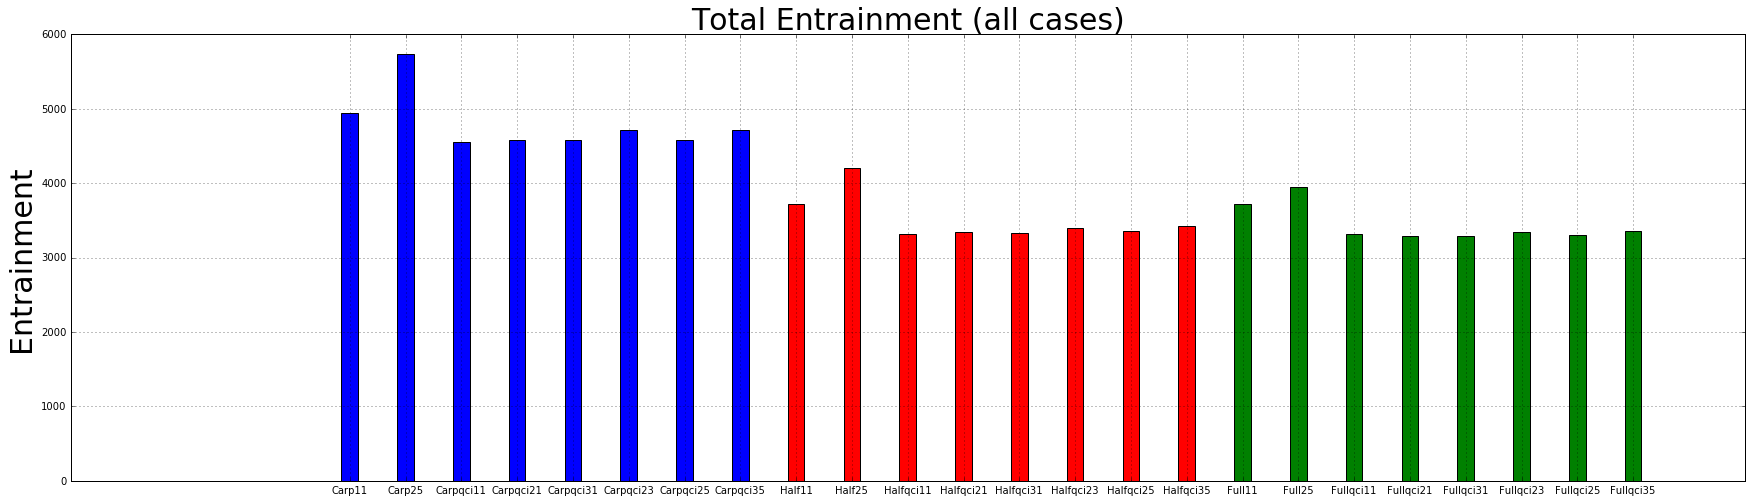

In [141]:
totalentrainarray = [totentrainc11,totentrainc25,totentraindilc11,totentraindilc21,totentraindilc31,totentrainqcic23,totentrainqcic25,totentrainqcic35,totentrainh11,totentrainh25,totentraindilh11,totentraindilh21,totentraindilh31,totentrainqcih23,totentrainqcih25,totentrainqcih35,totentrainf11,totentrainf25,totentraindilf11,totentraindilf21,totentraindilf31,totentrainqcif23,totentrainqcif25,totentrainqcif35]
fig = plt.figure(figsize=(30, 8))
y_pos = np.arange(len(totalentrainarray))
objects = ('Carp11', 'Carp25', 'Carpqci11', 'Carpqci21', 'Carpqci31', 'Carpqci23', 'Carpqci25', 'Carpqci35','Half11', 'Half25', 'Halfqci11', 'Halfqci21', 'Halfqci31', 'Halfqci23', 'Halfqci25', 'Halfqci35','Full11', 'Full25', 'Fullqci11', 'Fullqci21', 'Fullqci31', 'Fullqci23', 'Fullqci25', 'Fullqci35')


plt.bar(y_pos, totalentrainarray, align='center', width=0.3,color=['blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue', 'blue','red','red','red','red','red','red','red','red','green','green','green','green','green','green','green','green'])
plt.xticks(y_pos, objects)
plt.ylabel('Entrainment',fontsize=30)
plt.title('Total Entrainment (all cases)',fontsize=30)
grid('on')
plt.show()


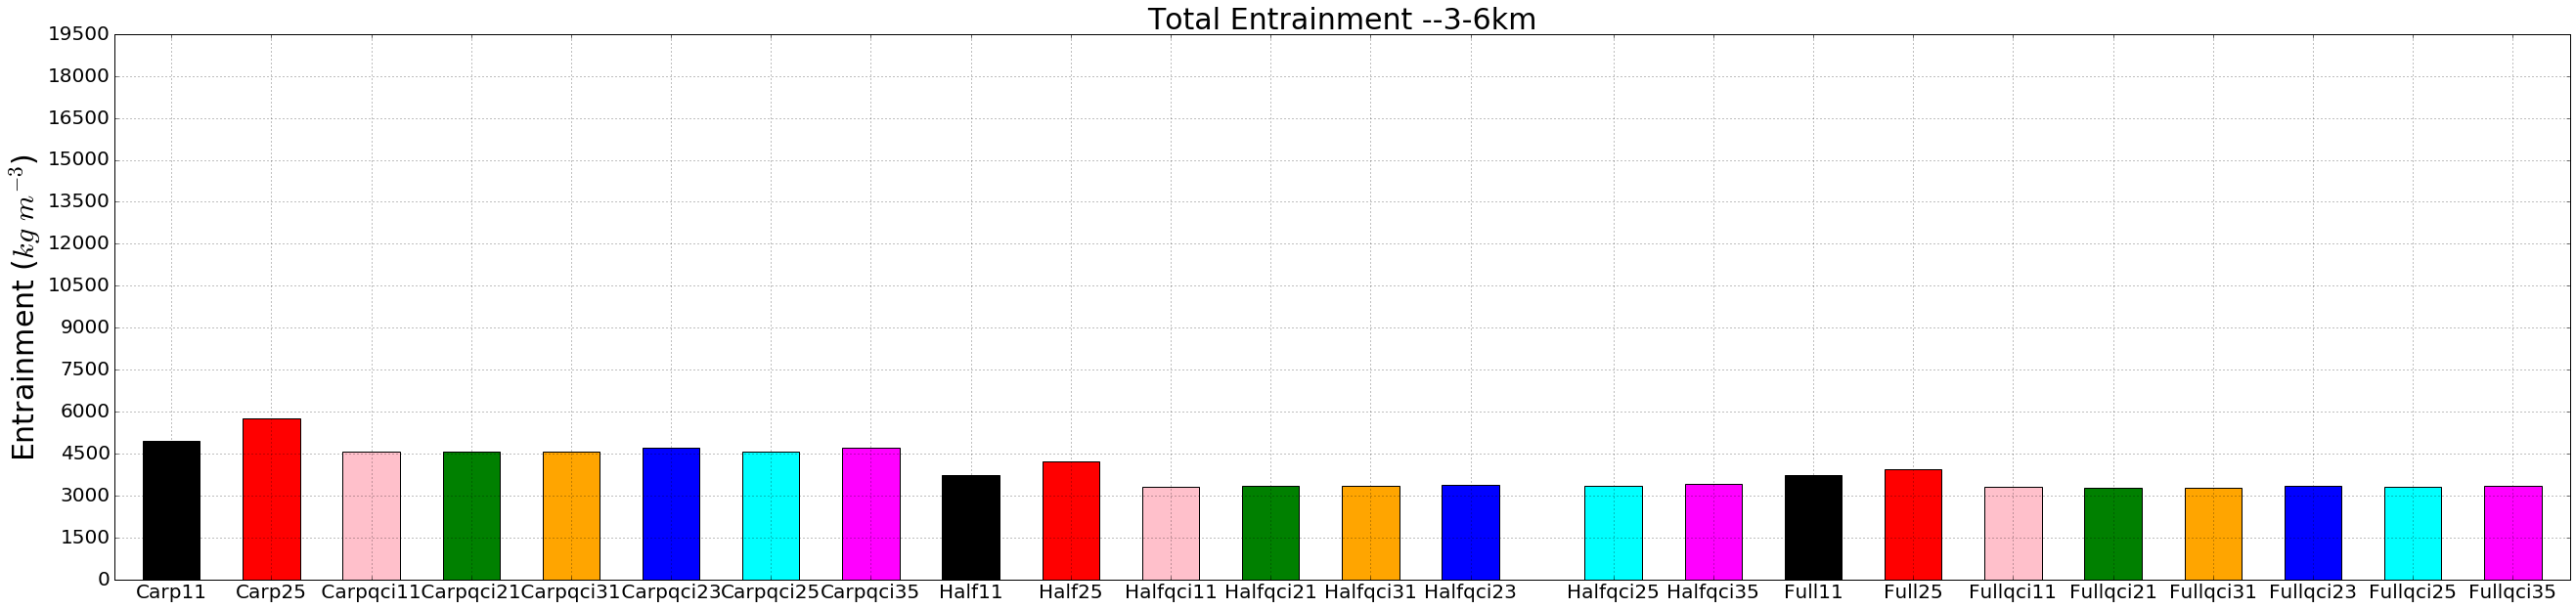

In [142]:
totalentrainarray = [totentrainc11,totentrainc25,totentraindilc11,totentraindilc21,totentraindilc31,totentrainqcic23,totentrainqcic25,totentrainqcic35,totentrainh11,totentrainh25,totentraindilh11,totentraindilh21,totentraindilh31,totentrainqcih23,totentrainqcih25,totentrainqcih35,totentrainf11,totentrainf25,totentraindilf11,totentraindilf21,totentraindilf31,totentrainqcif23,totentrainqcif25,totentrainqcif35]
fig = plt.figure(figsize=(45, 10))
y_pos = [0,1.75,3.5,5.25,7,8.75,10.5,12.25,14,15.75,17.5,19.25,21,22.75,25.25,27,28.75,30.5,32.25,34,35.75,37.5,39.25,41]
objects = ('Carp11', 'Carp25', ' Carpqci11 ', ' Carpqci21 ', ' Carpqci31 ', ' Carpqci23 ', 'Carpqci25', 'Carpqci35','Half11', 'Half25', 'Halfqci11', 'Halfqci21', 'Halfqci31', 'Halfqci23', 'Halfqci25', 'Halfqci35','Full11', 'Full25', 'Fullqci11', 'Fullqci21', 'Fullqci31', 'Fullqci23', 'Fullqci25', 'Fullqci35')
newpos = np.zeros(42)

plt.bar(y_pos, totalentrainarray, align = 'center',width=1.0,color=['black','red', 'pink','green','orange', 'blue', 'cyan', 'magenta'])
plt.xticks(y_pos, objects,fontsize=20)
plt.yticks(fontsize=20)
plt.xlim([-1,newpos.size])
plt.ylabel('Entrainment ($kg$ $m^{-3}$)',fontsize=30)
plt.title('Total Entrainment --3-6km',fontsize=30)
plt.yticks(np.arange(0, 19501, 1500))
# plt.xlim(0,0.3*10**12)
# plt.ylim(0,19500,1500)
grid('on')
# plt.show()

#savestr = 'half_qtotproj0_'+ str(i) +'.png'
plt.savefig('entrainnew36.png',dpi = 300)
# barlist=plt.bar([1,2,3,4], [1,2,3,4])
# >>> barlist[0].set_color('r')
# >>> plt.show()


In [143]:
print(np.shape(y_pos))

(24,)


In [170]:
# cloudtop1new = cloudtop1[11:21]
#cloudtop1new = np.reshape(cloudtop1new,(1,200))
#print(np.shape(cloudtop1new))

newestcloudtop1 = cloudtop1[2:61]
newestcloudtop2 = cloudtop2[8:45]
newestcloudtop3 = cloudtop3[13:45]

newcarpvol = qcivolumec23[2:61]
newhalfvol = qcivolumeh23[8:45]
newfullvol = qcivolumef23[13:45]

print(np.shape(newestcloudtop1))
print(np.shape(corecarpqv))

(59,)
(59,)


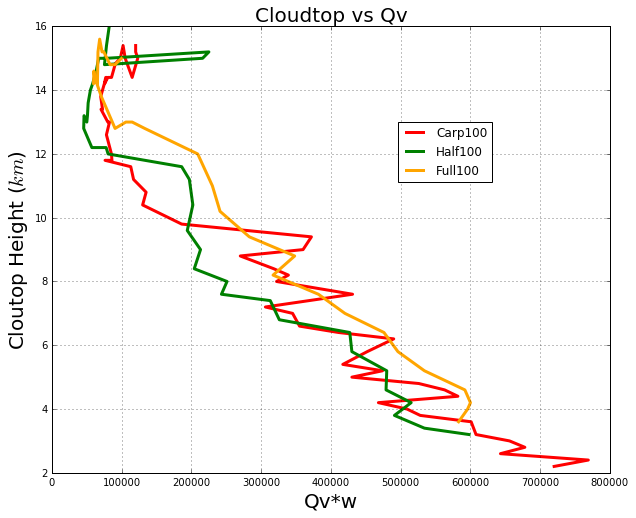

In [171]:
#psuedo PE QV
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(corecarpqv,newestcloudtop1,color="red",linewidth=3.0,label="Carp100")         #carp
ax = plt.plot(corehalfqv,newestcloudtop2,color="green",linewidth=3.0,label="Half100")         #half
ax = plt.plot(corefullqv,newestcloudtop3,color="orange",linewidth=3.0,label="Full100")         #full

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Qv*w', fontsize=20)
plt.title('Cloudtop vs Qv', fontsize=20)
# plt.xlim(0,0.3*10**12)
# plt.ylim(0,7)
plt.legend(bbox_to_anchor=(.8, .8), loc=1)
grid('on')

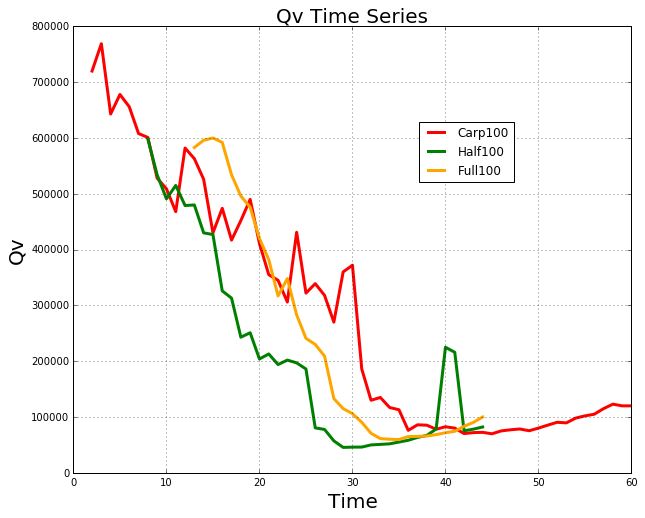

In [172]:
#psuedo PE QV
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(corecarpqv,color="red",linewidth=3.0,label="Carp100")         #carp
ax = plt.plot(corehalfqv,color="green",linewidth=3.0,label="Half100")         #half
ax = plt.plot(corefullqv,color="orange",linewidth=3.0,label="Full100")         #full

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Qv', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Qv Time Series', fontsize=20)
# plt.xlim(0,0.3*10**12)
# plt.ylim(0,7)
plt.legend(bbox_to_anchor=(.8, .8), loc=1)
grid('on')

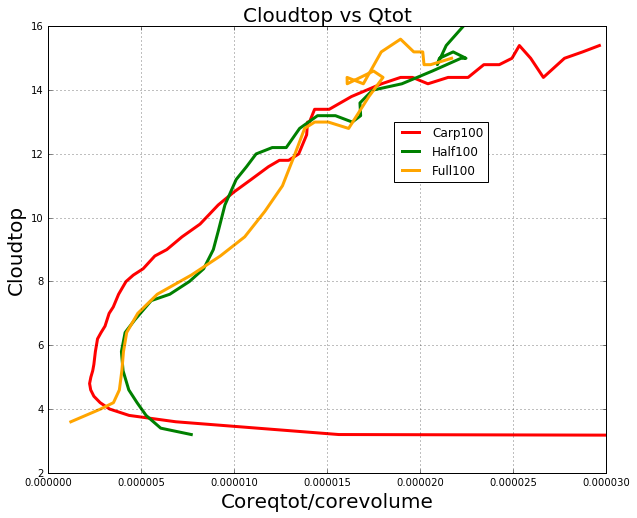

In [180]:
#psuedo PE Qtot cloudtop

newcarpqtot = corecarpqtot/(newcarpvol)
newhalfqtot = corehalfqtot/(newhalfvol)
newfullqtot = corefullqtot/(newfullvol)
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(newcarpqtot,newestcloudtop1,color="red",linewidth=3.0,label="Carp100")         #carp
ax = plt.plot(newhalfqtot,newestcloudtop2,color="green",linewidth=3.0,label="Half100")         #half
ax = plt.plot(newfullqtot,newestcloudtop3,color="orange",linewidth=3.0,label="Full100")         #full

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloudtop', fontsize=20)
plt.xlabel('Coreqtot/corevolume', fontsize=20)
plt.title('Cloudtop vs Qtot', fontsize=20)
plt.xlim(0,0.3*10**-4)
# plt.ylim(0,7)
plt.legend(bbox_to_anchor=(.8, .8), loc=1)
grid('on')

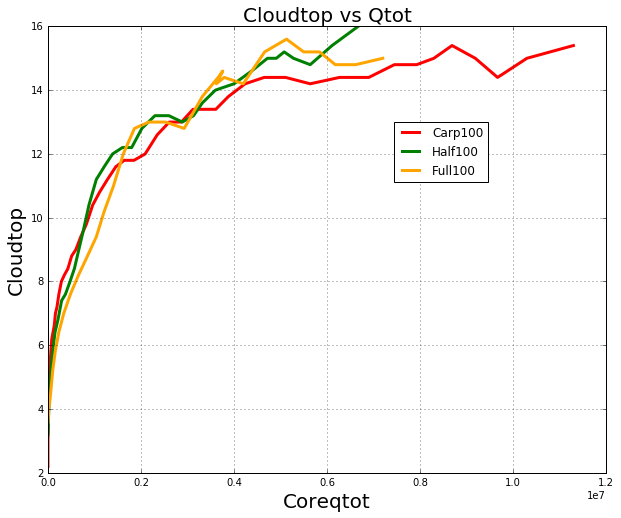

In [184]:
#psuedo PE Qtot cloudtop

newcarpqtot = corecarpqtot/(newcarpvol)
newhalfqtot = corehalfqtot/(newhalfvol)
newfullqtot = corefullqtot/(newfullvol)
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(corecarpqtot,newestcloudtop1,color="red",linewidth=3.0,label="Carp100")         #carp
ax = plt.plot(corehalfqtot,newestcloudtop2,color="green",linewidth=3.0,label="Half100")         #half
ax = plt.plot(corefullqtot,newestcloudtop3,color="orange",linewidth=3.0,label="Full100")         #full

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloudtop', fontsize=20)
plt.xlabel('Coreqtot', fontsize=20)
plt.title('Cloudtop vs Qtot', fontsize=20)
# plt.xlim(0,0.3*10**-4)
# plt.ylim(0,7)
plt.legend(bbox_to_anchor=(.8, .8), loc=1)
grid('on')

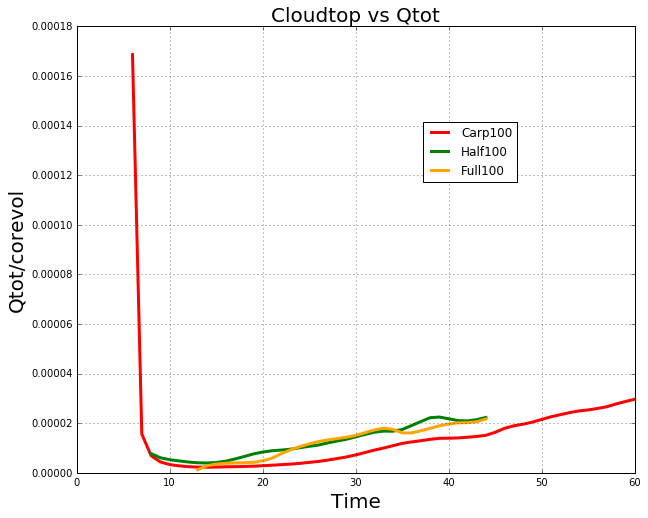

In [185]:
#psuedo PE Qtot
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(newcarpqtot,color="red",linewidth=3.0,label="Carp100")         #carp
ax = plt.plot(newhalfqtot,color="green",linewidth=3.0,label="Half100")         #half
ax = plt.plot(newfullqtot,color="orange",linewidth=3.0,label="Full100")         #full

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Qtot/corevol', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Cloudtop vs Qtot', fontsize=20)
# plt.xlim(0,0.3*10**12)
# plt.ylim(0,7)
plt.legend(bbox_to_anchor=(.8, .8), loc=1)
grid('on')

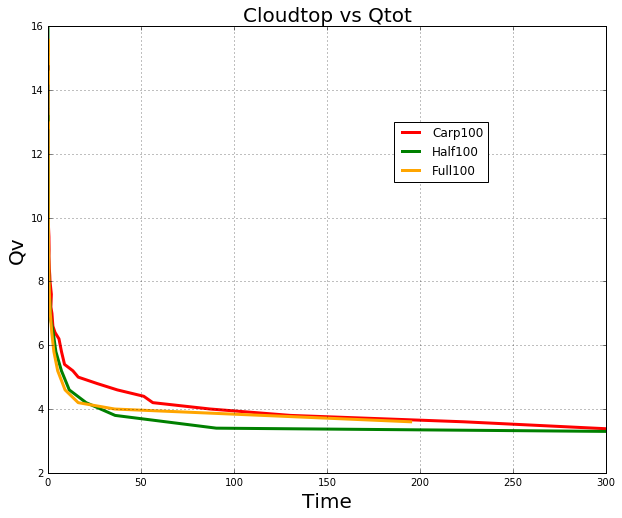

In [177]:
#psuedo PE // cloudtop
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(fakepecarp,newestcloudtop1,color="red",linewidth=3.0,label="Carp100")         #carp
ax = plt.plot(fakepehalf,newestcloudtop2,color="green",linewidth=3.0,label="Half100")         #half
ax = plt.plot(fakepefull,newestcloudtop3,color="orange",linewidth=3.0,label="Full100")         #full

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Qv', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Cloudtop vs Qtot', fontsize=20)
plt.xlim(0,0.3*10**3)
# plt.ylim(0,7)
plt.legend(bbox_to_anchor=(.8, .8), loc=1)
grid('on')

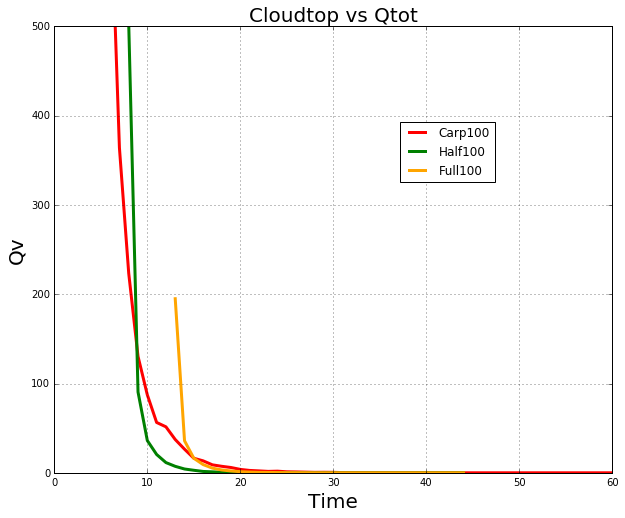

In [178]:
#psuedo PE // time
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(fakepecarp,color="red",linewidth=3.0,label="Carp100")         #carp
ax = plt.plot(fakepehalf,color="green",linewidth=3.0,label="Half100")         #half
ax = plt.plot(fakepefull,color="orange",linewidth=3.0,label="Full100")         #full

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Qv', fontsize=20)
plt.xlabel('Time', fontsize=20)
plt.title('Cloudtop vs Qtot', fontsize=20)
#plt.xlim(0,0.3*10**3)
plt.ylim(0,500)
plt.legend(bbox_to_anchor=(.8, .8), loc=1)
grid('on')

In [ ]:
#cloudtop vs core volume11 carp vs half
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(volumec11,cloudtop1,color="red",linewidth=3.0,label="11Carp100")         #carp
ax = plt.plot(dilvolumec11,cloudtop1,color="green",linewidth=3.0,label="11Carp100")         #carp11
ax = plt.plot(dilvolumec21,cloudtop1,color="orange",linewidth=3.0,label="21Carp100")         #carp21
ax = plt.plot(dilvolumec31,cloudtop1,color="purple",linewidth=3.0,label="31Carp100")         #carp31
ax = plt.plot(volumeh11,cloudtop2,color="blue",linewidth=3.0,label="11Half100")         #half
ax = plt.plot(dilvolumeh11,cloudtop2,color="brown",linewidth=3.0,label="11Half100")         #half11
ax = plt.plot(dilvolumeh21,cloudtop2,color="yellow",linewidth=3.0,label="21Half100")         #half21
ax = plt.plot(dilvolumeh31,cloudtop2,color="pink",linewidth=3.0,label="31Half100")         #half31
# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Core Volume ($m^3$))', fontsize=20)
plt.title('Cloudtop vs Core Volume11', fontsize=20)
# plt.xlim(0,0.3*10**12)
# plt.ylim(0,7)
plt.legend(bbox_to_anchor=(.5, .5), loc=1)
grid('on')

In [ ]:
#cloudtop vs core volume11 full vs half
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(volumef11,cloudtop3,color="red",linewidth=3.0,label="11Full100")         #full
ax = plt.plot(dilvolumef11,cloudtop3,color="green",linewidth=3.0,label="11Full100")         #full11
ax = plt.plot(dilvolumef21,cloudtop3,color="orange",linewidth=3.0,label="21Full100")         #full21
ax = plt.plot(dilvolumef31,cloudtop3,color="purple",linewidth=3.0,label="31Full100")         #full31
ax = plt.plot(volumeh11,cloudtop2,color="blue",linewidth=3.0,label="11Half100")         #half
ax = plt.plot(dilvolumeh11,cloudtop2,color="brown",linewidth=3.0,label="11Half100")         #half11
ax = plt.plot(dilvolumeh21,cloudtop2,color="yellow",linewidth=3.0,label="21Half100")         #half21
ax = plt.plot(dilvolumeh31,cloudtop2,color="pink",linewidth=3.0,label="31Half100")         #half31
# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Core Volume ($m^3$))', fontsize=20)
plt.title('Cloudtop vs Core Volume11', fontsize=20)
plt.ylim(0,17)
plt.legend(bbox_to_anchor=(.5, .5), loc=1)
grid('on')

In [ ]:
#cloudtop vs core volume25 carp vs half
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))


ax = plt.plot(volumec25,cloudtop1,color="red",linewidth=3.0,label="25Carp100")         #carp
ax = plt.plot(dilvolumec11,cloudtop1,color="green",linewidth=3.0,label="11Carp100")         #carp11
ax = plt.plot(dilvolumec21,cloudtop1,color="orange",linewidth=3.0,label="21Carp100")         #carp21
ax = plt.plot(dilvolumec31,cloudtop1,color="purple",linewidth=3.0,label="31Carp100")         #carp31
ax = plt.plot(volumeh25,cloudtop2,color="blue",linewidth=3.0,label="25Half100")         #half
ax = plt.plot(dilvolumeh11,cloudtop2,color="brown",linewidth=3.0,label="11Half100")         #half11
ax = plt.plot(dilvolumeh21,cloudtop2,color="yellow",linewidth=3.0,label="21Half100")         #half21
ax = plt.plot(dilvolumeh31,cloudtop2,color="pink",linewidth=3.0,label="31Half100")         #half31
#for i, txt in enumerate(n):
#    plt.annotate(txt, (volumeh11[i],cloudtop2[i]), fontsize=12)
#for i, txt in enumerate(m):
#    plt.annotate(txt, (volumec11[i],cloudtop1[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Core Volume ($m^3$)', fontsize=20)
plt.title('Cloudtop vs Core Volume25', fontsize=20)
plt.ylim(0,17)
plt.xlim(0,3.5*10**12)
plt.legend(bbox_to_anchor=(.35, .5), loc=1)
grid('on')

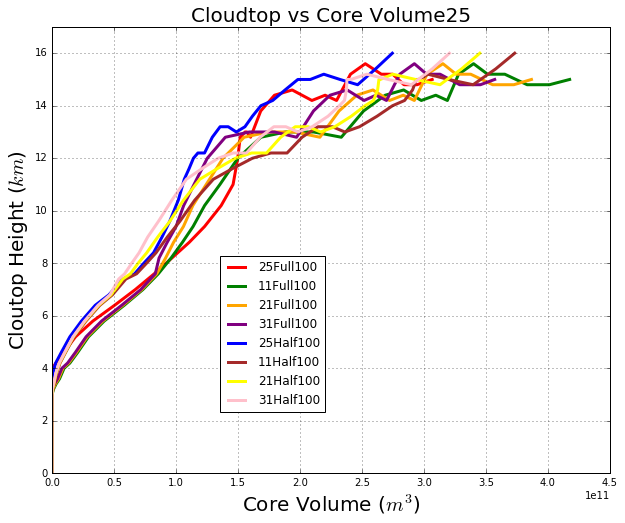

In [167]:
#cloudtop vs core volume25 full vs half
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(volumef25,cloudtop3,color="red",linewidth=3.0,label="25Full100")         #full
ax = plt.plot(dilvolumef11,cloudtop3,color="green",linewidth=3.0,label="11Full100")         #full11
ax = plt.plot(dilvolumef21,cloudtop3,color="orange",linewidth=3.0,label="21Full100")         #full21
ax = plt.plot(dilvolumef31,cloudtop3,color="purple",linewidth=3.0,label="31Full100")         #full31
ax = plt.plot(volumeh25,cloudtop2,color="blue",linewidth=3.0,label="25Half100")         #half
ax = plt.plot(dilvolumeh11,cloudtop2,color="brown",linewidth=3.0,label="11Half100")         #half11
ax = plt.plot(dilvolumeh21,cloudtop2,color="yellow",linewidth=3.0,label="21Half100")         #half21
ax = plt.plot(dilvolumeh31,cloudtop2,color="pink",linewidth=3.0,label="31Half100")         #half31
# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Core Volume ($m^3$)', fontsize=20)
plt.title('Cloudtop vs Core Volume25', fontsize=20)
plt.ylim(0,17)
plt.legend(bbox_to_anchor=(.5, .5), loc=1)
grid('on')

In [ ]:
#cloudtop vs entrain11 carp vs half
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(entrainc11,cloudtop1,color="red",linewidth=3.0,label="11Carp100")         #carp
# ax = plt.plot(dilentrainc11,cloudtop1,color="green",linewidth=3.0,label="11Carp100")         #carp11
# ax = plt.plot(dilentrainc21,cloudtop1,color="orange",linewidth=3.0,label="21Carp100")         #carp21
# ax = plt.plot(dilentrainc31,cloudtop1,color="purple",linewidth=3.0,label="31Carp100")         #carp31
ax = plt.plot(entrainh11,cloudtop2,color="blue",linewidth=3.0,label="11Half100")         #half
# ax = plt.plot(dilentrainh11,cloudtop2,color="brown",linewidth=3.0,label="11Half100")         #half11
# ax = plt.plot(dilentrainh21,cloudtop2,color="yellow",linewidth=3.0,label="21Half100")         #half21
# ax = plt.plot(dilentrainh31,cloudtop2,color="pink",linewidth=3.0,label="31Half100")         #half31
ax = plt.plot(entrainf11,cloudtop3,color="green",linewidth=3.0,label="11Full100")         #full
# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.title('Cloudtop vs Entrainment11', fontsize=20)
# plt.xlim(0,0.004)
# plt.ylim(0,9)
plt.legend(bbox_to_anchor=(.5, .5), loc=1)
grid('on')

In [ ]:
print(np.shape(cloudtop2))

In [ ]:
#PE time series plots
plt.figure(figsize=(10, 8))
plt.plot(pecarp[3:61],cloudtop1[3:61],color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(pehalf[8:45],cloudtop2[8:45],color="red",linewidth=3.0,label="Half100")        #half
plt.plot(pefull[13:45],cloudtop3[13:45],color="orange",linewidth=3.0,label="Full100")        #full
plt.xlabel('Precipitation Efficiency (UNITS??)', fontsize=20)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.title('PE vs Cloudtop', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#cloudtop vs entrain25 carp vs half
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(entrainc25,cloudtop1,color="red",linewidth=3.0,label="25Carp100")         #carp
# ax = plt.plot(dilentrainc11,cloudtop1,color="green",linewidth=3.0,label="11Carp100")         #carp11
# ax = plt.plot(dilentrainc21,cloudtop1,color="orange",linewidth=3.0,label="21Carp100")         #carp21
# ax = plt.plot(dilentrainc31,cloudtop1,color="purple",linewidth=3.0,label="31Carp100")         #carp31
ax = plt.plot(entrainh25,cloudtop2,color="blue",linewidth=3.0,label="25Half100")         #half
# ax = plt.plot(dilentrainh11,cloudtop2,color="brown",linewidth=3.0,label="11Half100")         #half11
# ax = plt.plot(dilentrainh21,cloudtop2,color="yellow",linewidth=3.0,label="21Half100")         #half21
# ax = plt.plot(dilentrainh31,cloudtop2,color="pink",linewidth=3.0,label="31Half100")         #half31
ax = plt.plot(entrainf25,cloudtop3,color="green",linewidth=3.0,label="25Full100")         #full
# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.title('Cloudtop vs Entrainment25', fontsize=20)
# plt.xlim(0,0.035)
# plt.ylim(2,11)
plt.legend(bbox_to_anchor=(.5, .5), loc=1)
grid('on')

In [ ]:
#cloudtop vs entrain comparisons
n = np.arange(1,46)
m = np.arange(1,62)
fig = plt.figure(figsize=(10, 8))

ax = plt.plot(entrainc11,cloudtop1,color="black",linewidth=3.0,label="11qtotCarp100")         #carpqtot11
ax = plt.plot(entrainc25,cloudtop1,color="red",linewidth=3.0,label="25qtotCarp100")         #carpqtot25
ax = plt.plot(dilentrainc11,cloudtop1,color="pink",linewidth=3.0,label="11qciCarp100")         #carpqci11
ax = plt.plot(dilentrainc21,cloudtop1,color="green",linewidth=3.0,label="21qciCarp100")         #carpqci21
ax = plt.plot(dilentrainc31,cloudtop1,color="orange",linewidth=3.0,label="31qciCarp100")         #carpqci31
ax = plt.plot(qcientrainc23,cloudtop1,color="blue",linewidth=3.0,label="23qciCarp100")         #carpqci23
ax = plt.plot(qcientrainc25,cloudtop1,color="cyan",linewidth=3.0,label="25qciCarp100")         #carpqci25
ax = plt.plot(qcientrainc35,cloudtop1,color="purple",linewidth=3.0,label="35qciCarp100")         #carpqci35

# ax = plt.plot(entrainh11,cloudtop2,color="black",linewidth=3.0,label="11qtotHalf100")         #halfqtot11
# ax = plt.plot(entrainh25,cloudtop2,color="red",linewidth=3.0,label="25qtotHalf100")         #halfqtot25
# ax = plt.plot(dilentrainh11,cloudtop2,color="pink",linewidth=3.0,label="11qciHalf100")         #halfqci11
# ax = plt.plot(dilentrainh21,cloudtop2,color="green",linewidth=3.0,label="21qciHalf100")         #halfqci21
# ax = plt.plot(dilentrainh31,cloudtop2,color="orange",linewidth=3.0,label="31qciHalf100")         #halfqci31
# ax = plt.plot(qcientrainh23,cloudtop2,color="blue",linewidth=3.0,label="23qciHalf100")         #halfqci23
# ax = plt.plot(qcientrainh25,cloudtop2,color="cyan",linewidth=3.0,label="25qciHalf100")         #halfqci25
# ax = plt.plot(qcientrainh35,cloudtop2,color="purple",linewidth=3.0,label="35qciHalf100")         #halfqci35

# ax = plt.plot(entrainf11,cloudtop3,color="black",linewidth=3.0,label="11qciFull100")         #fullqtot11
# ax = plt.plot(entrainf25,cloudtop3,color="red",linewidth=3.0,label="25qtotFull100")        #fullqtot25
# ax = plt.plot(dilentrainf11,cloudtop3,color="pink",linewidth=3.0,label="11qciFull100")         #fullqci11
# ax = plt.plot(dilentrainf21,cloudtop3,color="green",linewidth=3.0,label="21qciFull100")         #fullqci21
# ax = plt.plot(dilentrainf31,cloudtop3,color="orange",linewidth=3.0,label="31qciFull100")        #fullqci31
# ax = plt.plot(qcientrainf23,cloudtop3,color="blue",linewidth=3.0,label="23qciFull100")        #fullqci23
# ax = plt.plot(qcientrainf25,cloudtop3,color="cyan",linewidth=3.0,label="25qciFull100")        #fullqci25
# ax = plt.plot(qcientrainf35,cloudtop3,color="purple",linewidth=3.0,label="35qciFull100")       #fullqci35

# for i, txt in enumerate(n):
#     plt.annotate(txt, (volumeh11[i],cloudtop1[i]), fontsize=12)
# for i, txt in enumerate(m):
#     plt.annotate(txt, (volumec11[i],cloudtop2[i]), fontsize=12)
plt.ylabel('Cloutop Height ($km$)', fontsize=20)
plt.xlabel('Entrainment ($kg$ $m^{-2}$ $s^{-1}$)', fontsize=20)
plt.title('Cloudtop vs Entrainment Halfcarp', fontsize=20)
# plt.xlim(0,0.0005)
plt.ylim(0,16)
plt.legend(bbox_to_anchor=(.35, .9), loc=1)
grid('on')

In [ ]:


# ax = plt.plot(entrainc11,cloudtop1,color="black",linewidth=3.0,label="11qtotCarp100")         #carpqtot11
# ax = plt.plot(entrainc25,cloudtop1,color="red",linewidth=3.0,label="25qtotCarp100")         #carpqtot25
# ax = plt.plot(dilentrainc11,cloudtop1,color="pink",linewidth=3.0,label="11qciCarp100")         #carpqci11
# ax = plt.plot(dilentrainc21,cloudtop1,color="green",linewidth=3.0,label="21qciCarp100")         #carpqci21
# ax = plt.plot(dilentrainc31,cloudtop1,color="orange",linewidth=3.0,label="31qciCarp100")         #carpqci31
# ax = plt.plot(qcientrainc23,cloudtop1,color="blue",linewidth=3.0,label="23qciCarp100")         #carpqci23
# ax = plt.plot(qcientrainc25,cloudtop1,color="cyan",linewidth=3.0,label="25qciCarp100")         #carpqci25
# ax = plt.plot(qcientrainc35,cloudtop1,color="purple",linewidth=3.0,label="35qciCarp100")         #carpqci35


In [ ]:
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(cloudtop1,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(cloudtop2,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(cloudtop3,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Height ($km$)', fontsize=20)
plt.xlabel('Time in min (Add 50 min for Blue line)', fontsize=20)
plt.title('Time series of Cloud Top height', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#core volume time series11
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(volumec11,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(volumeh11,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(volumef11,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Core Volume ($m^3$)', fontsize=20)
plt.xlabel('Time in min (Add 50 min for Blue line)', fontsize=20)
plt.title('Time series of Core Volume qtot11', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#core volume time series25
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(volumec25,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(volumeh25,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(volumef25,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Core Volume ($m^3$)', fontsize=20)
plt.xlabel('Time in min (Add 50 min for Blue line)', fontsize=20)
plt.title('Time series of Core Volume qtot25', fontsize=20)
plt.ylim(0,3.5*10**12)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series11
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(entrainc11,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(entrainh11,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(entrainf11,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time in min (Add 50 min for Blue line)', fontsize=20)
plt.title('Time series of Entrainment Added over Height qtot11', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series25
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(entrainc25,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(entrainh25,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(entrainf25,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time in min (Add 50 min for Blue line)', fontsize=20)
plt.ylim(0,.035)
plt.title('Time series of Entrainment Added over Height qtot25', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series11  **qci**
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(dilentrainc11,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(dilentrainh11,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(dilentrainf11,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time in min (Add 50 min for Blue line)', fontsize=20)
plt.ylim(0,.035)
plt.title('Time series of Entrainment Added over Height qci11', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series21  **qci**
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(dilentrainc21,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(dilentrainh21,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(dilentrainf31,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time ($min$) (Add 50 min for Blue line)', fontsize=20)
plt.ylim(0,.035)
plt.title('Time series of Entrainment Added over Height qci21', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series31  **qci**
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(dilentrainc31,color="blue",linewidth=3.0,label="Carp100")         #carp
plt.plot(dilentrainh31,color="red",linewidth=3.0,label="Half100")        #half
plt.plot(dilentrainf31,color="orange",linewidth=3.0,label="Full100")        #full
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time ($min$) (Add 50 min for Blue line)', fontsize=20)
plt.ylim(0,.035)
plt.title('Time series of Entrainment Added over Height qci31', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series carpenter
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(entrainc11,color="blue",linewidth=3.0,label="Carp100qtot11")         #carp11
plt.plot(entrainc25,color="red",linewidth=3.0,label="Carp100qtot25")        #carp25
plt.plot(dilentrainc11,color="orange",linewidth=3.0,label="Carp100qci11")        #carpqci11
plt.plot(dilentrainc21,color="purple",linewidth=3.0,label="Carp100qci21")        #carpqci21
plt.plot(dilentrainc31,color="pink",linewidth=3.0,label="Carp100qci31")        #carpqci31
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time ($min$) (Add 50 min)', fontsize=20)
plt.title('Time series of Entrainment Added over Height Carp', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series half
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(entrainh11,color="blue",linewidth=3.0,label="Half100qtot11")         #half11
plt.plot(entrainh25,color="red",linewidth=3.0,label="Half100qtot25")        #half25
plt.plot(dilentrainh11,color="orange",linewidth=3.0,label="Half100qci11")        #halfqci11
plt.plot(dilentrainh21,color="purple",linewidth=3.0,label="Half100qci21")        #halfqci21
plt.plot(dilentrainh31,color="pink",linewidth=3.0,label="Half100qci31")        #halfqci31
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time ($min$)', fontsize=20)
plt.ylim(0,.035)
plt.title('Time series of Entrainment Added over Height Half', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#total entrainment time series full
plt.figure(figsize=(10, 8))
newtime1=(np.arange(55,117,1))
newtime2=(np.arange(0,45,1))
plt.plot(entrainf11,color="blue",linewidth=3.0,label="Full100qtot11")         #full11
plt.plot(entrainf25,color="red",linewidth=3.0,label="Full100qtot25")        #full25
plt.plot(dilentrainf11,color="orange",linewidth=3.0,label="Full100qci11")        #fullqci11
plt.plot(dilentrainf21,color="purple",linewidth=3.0,label="Full100qci21")        #fullqci21
plt.plot(dilentrainf31,color="pink",linewidth=3.0,label="Full100qci31")        #fullqci31
plt.ylabel('Total entrainment ($kg$ $m^{-3}$ $s^{-1}$)', fontsize=20)
plt.xlabel('Time ($min$)', fontsize=20)
plt.ylim(0,.035)
plt.title('Time series of Entrainment Added over Height Full', fontsize=20)
plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)
grid('on')

In [ ]:
#cloudtop1 = half 45 min            #cloudtop2 = carp 61 min

figsize=(8, 8)
timehalf1=(np.arange(0,46,1))
timecarp2=(np.arange(55,117,1))



fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(111)
ax1.set_xlabel(r"Halfbub time axis", fontsize=20)
ax1.set_ylabel(r"Height (km)", fontsize=20)
ax2.set_title(r"Time series of Cloud top Height", fontsize=20)
ax2 = ax1.twiny()

ax1.plot(timehalf1,cloudtop1,color="blue",linewidth=3.0,label="Half100")
ax1.legend(bbox_to_anchor=(.35, 1.0), loc=2)

ax2.set_xlabel(r"Gaussian time axis", fontsize=20)

ax2.set_xlim(55,120) 
#ax2.invert_xaxis()
ax2.plot(timecarp2,cloudtop2,color="red",linewidth=3.0,label="Carp100")
#ax2.set_xlim(ax1.get_xlim())
ax2.legend(bbox_to_anchor=(.35, 1.0), loc=1)
ax2.grid(True, which='both')
ax1.grid(True, which='both')
plt.show()

plt.legend(bbox_to_anchor=(.35, 1.0), loc=1)


In [ ]:
newtime.shape

In [ ]:
cloudtop1.shape


In [ ]:
timehalf1.shape

In [ ]:
arrays = [np.random.randn(3, 4)]
#


In [ ]:
print(np.shape(arrays))